# [8 of the best spring break party destinations](https://abcnews.go.com/GMA/Travel/best-spring-break-party-destinations/story?id=52904679)

### Web Scraping

##### Imports

In [198]:
from bs4 import BeautifulSoup
import requests

##### URLs

In [199]:
url = "https://abcnews.go.com/GMA/Travel/best-spring-break-party-destinations/story?id=52904679"

##### Requesting the Page

In [200]:
r = requests.get(url)

##### Get Text

In [201]:
t = r.text

##### Close the request

In [202]:
r.close()

##### Make BeautifulSoup

In [203]:
soup = BeautifulSoup(t)

##### What is Soup?

In [204]:
type(t)

str

In [205]:
str?

In [206]:
type(soup)

bs4.BeautifulSoup

In [207]:
BeautifulSoup?

##### Soup can `find` things

In [208]:
# find all hyperlinks
# 'a' stands for anchor tag, href stands for Hypertext REFrence
for link in soup.find_all(name='a', href=True):
    print(link['href'])

#
/
https://abcnews.go.com/Video
https://abcnews.go.com/US
https://abcnews.go.com/International
https://abcnews.go.com/Politics
https://abcnews.go.com/Lifestyle
https://abcnews.go.com/Entertainment
https://abcnews.go.com/VR
https://abcnews.go.com/Health
https://abcnews.go.com/Technology
https://abcnews.go.com/Sports
https://abcnews.go.com/alerts/weather
https://fivethirtyeight.com
#
https://www.goodmorningamerica.com
https://abcnews.go.com/WN
https://abcnews.go.com/Nightline
https://abcnews.go.com/2020
https://abcnews.go.com/ThisWeek
https://abcnews.go.com/TheView
https://abcnews.go.com/WhatWouldYouDo
#
https://abcnews.go.com/live/video/special-live-11
https://abcnews.go.com/live/video/special-live-2
https://abcnews.go.com/live/video/special-live-5
https://abcnews.go.com/live/video/special-live-06
https://abcnews.go.com/live/video/special-live-3
https://abcnews.go.com/live/video/special-live-07
#
http://disneyprivacycenter.com
https://disneyprivacycenter.com/notice-to-california-reside

# Get the List of Vacation Spots

In [209]:
# soup.find returns the first child (see docs)
soup.find(name='strong')

<strong>1. Cancun</strong>

In [210]:
# store the the result
result = soup.find(name='strong')

# display the type of the `result`
type(result)

bs4.element.Tag

In [211]:
# access the text in `result`
result.text

'1. Cancun'

In [212]:
# find all locations in the html
soup.find_all(name='strong')

[<strong>1. Cancun</strong>,
 <strong>2. Las Vegas</strong>,
 <strong>3. Jamaica</strong>,
 <strong>4. Miami</strong>,
 <strong>5. Dominican Republic</strong>,
 <strong>6. South Padre Island</strong>,
 <strong>7. Puerto Vallarta</strong>,
 <strong>8. Bahamas</strong>]

In [213]:
# store all results
results = soup.find_all(name='strong')

In [214]:
# display the type of `results`
type(results)

bs4.element.ResultSet

In [215]:
# print the text for each result in `results`
for result in results:
    print(result.text)

1. Cancun
2. Las Vegas
3. Jamaica
4. Miami
5. Dominican Republic
6. South Padre Island
7. Puerto Vallarta
8. Bahamas


In [216]:
# make a list of the result.text's
# define result_texts as an empty list
result_texts = []
# loop through the results...
for result in results:
    # and append them to the result_texts list
    result_texts.append(result.text)

# show result_texts
result_texts

['1. Cancun',
 '2. Las Vegas',
 '3. Jamaica',
 '4. Miami',
 '5. Dominican Republic',
 '6. South Padre Island',
 '7. Puerto Vallarta',
 '8. Bahamas']

In [217]:
# print the location names without the index
for location in result_texts:
    print(location[3:])

Cancun
Las Vegas
Jamaica
Miami
Dominican Republic
South Padre Island
Puerto Vallarta
Bahamas


In [218]:
# problem: What if I had a list of 10 locations?
# I wouldn't be able to use my logic above because it would keep an extra space in front of the name.
# use `split` to remove the index
for location in result_texts:
    print(location.split()[1:])

['Cancun']
['Las', 'Vegas']
['Jamaica']
['Miami']
['Dominican', 'Republic']
['South', 'Padre', 'Island']
['Puerto', 'Vallarta']
['Bahamas']


In [219]:
# store the location names without indices in a new list
no_index = []
for location in result_texts:
    no_index.append(location.split()[1:])

# show `no_index`
no_index

[['Cancun'],
 ['Las', 'Vegas'],
 ['Jamaica'],
 ['Miami'],
 ['Dominican', 'Republic'],
 ['South', 'Padre', 'Island'],
 ['Puerto', 'Vallarta'],
 ['Bahamas']]

In [220]:
# `no_index` is a list of lists
# want to join the strings in each list together to get a list of strings
for l in no_index:
    print(''.join(l))

Cancun
LasVegas
Jamaica
Miami
DominicanRepublic
SouthPadreIsland
PuertoVallarta
Bahamas


In [221]:
# it worked, but the join didn't put a space between the words
# try it again, but include a space
for l in no_index:
    print(' '.join(l))

Cancun
Las Vegas
Jamaica
Miami
Dominican Republic
South Padre Island
Puerto Vallarta
Bahamas


In [222]:
# much better
# let's save these locations in another list
locations = []
for l in no_index:
    locations.append(' '.join(l))

# show locations
locations

['Cancun',
 'Las Vegas',
 'Jamaica',
 'Miami',
 'Dominican Republic',
 'South Padre Island',
 'Puerto Vallarta',
 'Bahamas']

In [223]:
# check the `len`gth of locations (should == 8)
len(locations)

8

In [224]:
# that seemed like a lot of work just to extract the names from our results...
# well here's a one-liner
[' '.join(i.text.split()[1:]) for i in soup.find_all(name='strong')]

['Cancun',
 'Las Vegas',
 'Jamaica',
 'Miami',
 'Dominican Republic',
 'South Padre Island',
 'Puerto Vallarta',
 'Bahamas']

This bit of code is called [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions). It's very handy and is often faster than standard for-loops (when n is large).

In [225]:
%%timeit -n 1000
result_texts = []
for i in soup.find_all(name='strong'):
    result_texts.append(' '.join(i.text.split()[1:]))

1.35 ms ± 178 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [226]:
%%timeit -n 1000
[' '.join(i.text.split()[1:]) for i in soup.find_all(name='strong')]

1.01 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


As a precautionary side-note, don't use list comprehension if you don't understand it or the loop is too complex. You can get unexpected results, especially when attempting multiple loops.

# Get Information on the Locations

### Wikipedia

In [227]:
# wikipedia url
wiki_url = "https://en.wikipedia.org/wiki/"

In [228]:
# loop through the locations
for l in locations:
    # add the wiki url to the location name and replace spaces with underscores
    print(f"{wiki_url}{l.replace(' ', '_')}")

https://en.wikipedia.org/wiki/Cancun
https://en.wikipedia.org/wiki/Las_Vegas
https://en.wikipedia.org/wiki/Jamaica
https://en.wikipedia.org/wiki/Miami
https://en.wikipedia.org/wiki/Dominican_Republic
https://en.wikipedia.org/wiki/South_Padre_Island
https://en.wikipedia.org/wiki/Puerto_Vallarta
https://en.wikipedia.org/wiki/Bahamas


In [229]:
from time import sleep

In [230]:
# scrape each page and store in a dictionary
# define empty dictionary
location_wiki = {}
# loop through the locations...
for l in locations:
    # request the page from wikipedia
    r = requests.get(f"{wiki_url}{l}")
    # make the soup
    soup = BeautifulSoup(r.text)
    # close the request
    r.close()
    # store the soup in the dictionary
    location_wiki[l] = soup
    # wait 2 seconds before scraping again (this respects the robots.txt... and keeps us from getting blocked by wikipedia)
    sleep(2)

# Data Frames

In [231]:
import pandas as pd

In [232]:
# now that we've scraped the wiki pages, let's store some information in a dataframe using `pandas`
# we know `location_wiki` is a dict
type(location_wiki)

dict

In [233]:
# so let's use pandas' DataFrame attribute `from_dict` and orient our keys so that they are the index instead of columns
df = pd.DataFrame.from_dict(location_wiki, orient='index')

In [234]:
# take a peek at df
df.head()

,0,1,2
Cancun,html,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...",
Las Vegas,html,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...",
Jamaica,html,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...",
Miami,html,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...",
Dominican Republic,html,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...",


In [235]:
# we have an index with the names of our locations...
df.index

Index(['Cancun', 'Las Vegas', 'Jamaica', 'Miami', 'Dominican Republic',
       'South Padre Island', 'Puerto Vallarta', 'Bahamas'],
      dtype='object')

In [236]:
# and we have 3 columns
df.columns

RangeIndex(start=0, stop=3, step=1)

In [237]:
# describe our columns
df.describe(include='all') # the `include` parameter allows us to choose what kinds of data types to include
# `describe` only includes numeric columns by default

,0,1,2
count,8,8,8
unique,1,8,1
top,html,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...",
freq,8,1,8


In [238]:
# you can see that columns 0 and 2 have only one unique value ('html' for 0, and an empty string for 2)
# let's drop these two columns and save over df using `inplace`
df.drop(columns=[
    0,
    2
], inplace=True)

In [239]:
# let's see what df looks like now
df.head()

,1
Cancun,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."
Las Vegas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."
Jamaica,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."
Miami,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."
Dominican Republic,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."


In [240]:
# while we only have one column in df, the name of the column isn't very informative. Let's rename it and save over df
df.rename(columns={
    1 : 'scraped'
}, inplace=True)

In [241]:
# check if the column name changed
df.columns

Index(['scraped'], dtype='object')

In [242]:
# to begin disecting our scraped data, it would be nice to know how to look at one row
# there are multiple ways to do this, but the best practice is to use label or integer indexing
# label indexing uses the `.loc` property
df.loc['Cancun']

scraped    <html class="client-nojs" dir="ltr" lang="en">...
Name: Cancun, dtype: object

In [243]:
# integer indexing uses the `.iloc` property
df.iloc[0]

scraped    <html class="client-nojs" dir="ltr" lang="en">...
Name: Cancun, dtype: object

In [244]:
# you can get a list of rows by giving the property a list of the indices
df.loc[[
    'Cancun',
    'Bahamas'
]]

,scraped
Cancun,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."
Bahamas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."


In [245]:
# you can also give the property a "slice"
df.iloc[2:4]

,scraped
Jamaica,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."
Miami,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."


In [246]:
# notice that only 2 rows were returned (the second and third)
# This is becasue the slice is inclusive of the left, and exclusive of the right
# If you want to start from an index and include everything after, you can leave of the right bound
df.iloc[2:]

,scraped
Jamaica,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."
Miami,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."
Dominican Republic,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."
South Padre Island,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."
Puerto Vallarta,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."
Bahamas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">..."


In [247]:
# you can also index on columns
# if you want all rows and a specific column you use the colon (:) for the rows, then a comma to begin indexing on columns
# remember that the colon is used for "slicing"
df.loc[:, 'scraped']

Cancun                <html class="client-nojs" dir="ltr" lang="en">...
Las Vegas             <html class="client-nojs" dir="ltr" lang="en">...
Jamaica               <html class="client-nojs" dir="ltr" lang="en">...
Miami                 <html class="client-nojs" dir="ltr" lang="en">...
Dominican Republic    <html class="client-nojs" dir="ltr" lang="en">...
South Padre Island    <html class="client-nojs" dir="ltr" lang="en">...
Puerto Vallarta       <html class="client-nojs" dir="ltr" lang="en">...
Bahamas               <html class="client-nojs" dir="ltr" lang="en">...
Name: scraped, dtype: object

In [248]:
# when you index on one column, a `series` is returned, which is just data analysis jargon for column
type(df.loc[:, 'scraped'])

pandas.core.series.Series

In [249]:
# now we've figured out how to slice our data, let's look at one row and disect the html in the 'scraped' column
cancun_scraped = df.loc['Cancun', 'scraped']

In [250]:
# check the type of the value
type(cancun_scraped)

bs4.element.Tag

In [251]:
# the value is soup!
# this means we it has attributes that we can use to extract values from the html
# looking at the webpage for this index, we can see that there is a Table of Contents (toc), find it in the html/store it
cancun_scraped_toc = cancun_scraped.find(name='div', attrs={
    'id' : 'toc',
    'class' : 'toc'
})

In [252]:
# we've got the toc, but how do we get the values?
# notice in the html the values "ul" and "li"
# "ul" means "unordered list" and "li" means "list item"
# we need the whole "ul" and each "li" in it
# to get to the "ul" quickly, we can actually use dot-notation to access it, `find_all` the "li" in it, store it
cancun_scraped_toc_ul = cancun_scraped_toc.ul.find_all(name='li')

In [253]:
# look at the first "li" in the "ul"
cancun_scraped_toc_ul[0]

<li class="toclevel-1 tocsection-1"><a href="#Etymology_and_coat_of_arms"><span class="tocnumber">1</span> <span class="toctext">Etymology and coat of arms</span></a></li>

In [254]:
# this "li" has a few bits of information
# but we're only interested in the Table of Contents Text (toctext)
# extract it for this "li", then look at the text
cancun_scraped_toc_ul[0].find(name='span', attrs={
    'class' : 'toctext'
}).text

'Etymology and coat of arms'

In [255]:
# the goal here is to do this for every "li"
# let's test it on our current "ul"
for li in cancun_scraped_toc_ul:
    print(li.find(name='span', attrs={
        'class' : 'toctext'
    }).text)

Etymology and coat of arms
History
City layout
Cancún Airport's old Control Tower Memorial
Maya archaeological sites
Transportation
Climate
Hurricane Gilbert
Hurricane Wilma
Hurricane Dean
Education
Sports
Drug trafficking network
Sister cities
See also
References
External links


In [256]:
# it worked
# to do this for all our rows we can `apply` our current work flow to df
# start by `find`ing the "toc" and saving the returned html as a new column, "table_of_contents"
df['table_of_contents'] = df.scraped.apply(lambda x : x.find(name='div', attrs={
    'id' : 'toc',
    'class' : 'toc'
}))

In [257]:
# let's look at our new column
df.table_of_contents

Cancun                <div class="toc" id="toc"><input class="toctog...
Las Vegas             <div class="toc" id="toc"><input class="toctog...
Jamaica               <div class="toc" id="toc"><input class="toctog...
Miami                 <div class="toc" id="toc"><input class="toctog...
Dominican Republic    <div class="toc" id="toc"><input class="toctog...
South Padre Island                                                 None
Puerto Vallarta       <div class="toc" id="toc"><input class="toctog...
Bahamas               <div class="toc" id="toc"><input class="toctog...
Name: table_of_contents, dtype: object

In [258]:
# notice that value in the "South Padre Island" row is None
# this should mean that the wiki page for South Padre Island has not Table of Contents
# let's check and make sure that's true... it is
# if you were to search "South Padre Island, Texas" you get a Table of Contents, but that's not what we searched
# let's continue applying our workflow to our new `table_of_contents` column
df.table_of_contents.apply(lambda x : x.ul.find_all(name='li'))

AttributeError: 'NoneType' object has no attribute 'ul'

In [259]:
# trying to look for "ul" returns an AttributeError
# this is because "South Padre Island" doesn't have the attribute "ul" (because it doesn't have a "toc")
# to get around this we can `.dropna` from "table_of_contents" before applying our function
# do this, then store the results in a new column "toc_ul_li"
df['toc_ul_li'] = df.table_of_contents.dropna().apply(lambda x : x.ul.find_all(name='li'))

In [260]:
# take a look at the column
df.toc_ul_li

Cancun                [<li class="toclevel-1 tocsection-1"><a href="...
Las Vegas             [<li class="toclevel-1 tocsection-1"><a href="...
Jamaica               [<li class="toclevel-1 tocsection-1"><a href="...
Miami                 [<li class="toclevel-1 tocsection-1"><a href="...
Dominican Republic    [<li class="toclevel-1 tocsection-1"><a href="...
South Padre Island                                                  NaN
Puerto Vallarta       [<li class="toclevel-1 tocsection-1"><a href="...
Bahamas               [<li class="toclevel-1 tocsection-1"><a href="...
Name: toc_ul_li, dtype: object

In [261]:
# note that we now have lists for values in our toc_ul_li column
# to apply our function on each item in the list we'll need to use list comprehension
# also, don't forget to `.dropna` else risk an error
# when you've figured it out, store as "toc_text"
df['toc_text'] = df.toc_ul_li.dropna().apply(lambda x : [li.find(name='span', attrs={
    'class' : 'toctext'
}).text for li in x])

In [262]:
# look at the column "toc_text"
df.toc_text

Cancun                [Etymology and coat of arms, History, City lay...
Las Vegas             [History, Geography, Climate, Nearby communiti...
Jamaica               [Etymology, History, Prehistory, Spanish rule ...
Miami                 [History, Geography, Geology, Cityscape, Neigh...
Dominican Republic    [Names and etymology, History, Pre-European hi...
South Padre Island                                                  NaN
Puerto Vallarta       [History, Pre-Hispanic times to the 19th centu...
Bahamas               [Etymology, History, 18th–19th centuries, 20th...
Name: toc_text, dtype: object

In [263]:
# we still have lists as our values... but at least they are lists of text and not html
# before we continue any further let's drop some columns that we don't need anymore
# first, list the columns
df.columns

Index(['scraped', 'table_of_contents', 'toc_ul_li', 'toc_text'], dtype='object')

In [264]:
# 'scraped' contains all the html for each row; it should be kept
# 'table_of_contents' contains the original html for the toc; it can be dropped
# 'toc_ul_li' contains a list of the html for each item in the toc; it can be dropped
# 'toc_text' is what we were trying to get to; it should be kept and probably renamed to 'toc
# drop the columns
df.drop(columns=[
    'table_of_contents',
    'toc_ul_li'
], inplace=True)

In [265]:
# rename 'toc_text' to 'toc'
df.rename(columns={
    'toc_text' : 'toc'
}, inplace=True)

In [266]:
# let's look at what df looks like now
df.head()

,scraped,toc
Cancun,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...","[Etymology and coat of arms, History, City lay..."
Las Vegas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...","[History, Geography, Climate, Nearby communiti..."
Jamaica,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...","[Etymology, History, Prehistory, Spanish rule ..."
Miami,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...","[History, Geography, Geology, Cityscape, Neigh..."
Dominican Republic,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...","[Names and etymology, History, Pre-European hi..."


In [267]:
# nice and clean
# let's get some general information about each row from our toc column, like how many items are in each
# to do this we'll look at the toc column only, and then find the `len`gth of the list in each row
df.toc.str.len()

Cancun                17.0
Las Vegas             36.0
Jamaica               43.0
Miami                 39.0
Dominican Republic    56.0
South Padre Island     NaN
Puerto Vallarta       46.0
Bahamas               35.0
Name: toc, dtype: float64

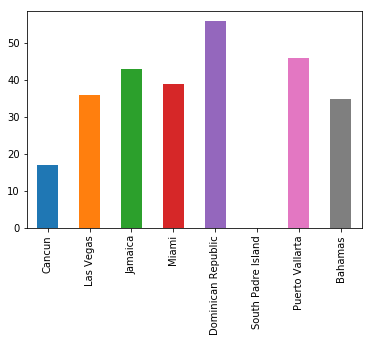

In [268]:
# all the toc's lengths look different
# let's visualize this in a bar graph

%matplotlib inline

df.toc.str.len().plot.bar();

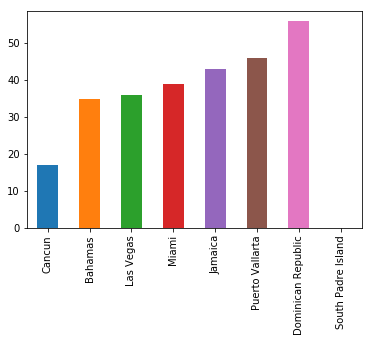

In [269]:
# the bar plot makes it easy to compare the toc lengths amongst the locations
# however, it's still hard to see the ascending/descending length order
# let's sort the values and then graph again
df.toc.str.len().sort_values().plot.bar();

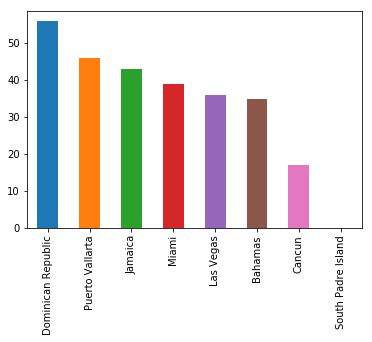

In [270]:
# notice that "South Padre Island" is at the far right rather than the left
# this is because the value is `NaN` rather than 0. If it was 0 then it would be on the far left
# suppose you wanted to graph the values in descending order rather than ascending
# `.sort_values` accepts the parameter `ascending` where the default value is `True`
# switch it to `False` and watch the graph reverse
df.toc.str.len().sort_values(ascending=False).plot.bar();

In [271]:
# notice that "South Padre Island" was placed on the far right again
# `.sort_values` does this by default with the parameter `na_position` which is set to "last" by default
# suppose we want a row for each toc item with respect to location
# to do this we can apply the function `pd.Series` to the column and watch the values explode into columns
df.toc.apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
Cancun,Etymology and coat of arms,History,City layout,Cancún Airport's old Control Tower Memorial,Maya archaeological sites,Transportation,Climate,Hurricane Gilbert,Hurricane Wilma,Hurricane Dean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Las Vegas,History,Geography,Climate,Nearby communities,Neighborhoods,Demographics,Economy,Tourism,Downtown casinos,Las Vegas Strip,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jamaica,Etymology,History,Prehistory,Spanish rule (1509–1655),British rule (1655–1962),Independence (1962),Government and politics,Political parties and elections,Administrative divisions,Military,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Miami,History,Geography,Geology,Cityscape,Neighborhoods,Climate,Demographics,"Race, ethnicity, religion, and languages","Education, households, and income",Civic engagement,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dominican Republic,Names and etymology,History,Pre-European history,European colonization,18th century,French rule,Independence from Spain (1821),Unification of Hispaniola (1822–44),Independence from Haiti (1844),First Republic,...,Cuisine,Music and dance,Fashion,National symbols,Sports,See also,Notes and references,Bibliography,Further reading,External links
South Padre Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puerto Vallarta,History,Pre-Hispanic times to the 19th century,El Carrizal and Las Peñas - 19th century,The early municipality - early 20th century,The modern resort - 1960s to the present,Climate,Hurricane Patricia,"Geography, geology and ecology",Geographical characteristics,Seismic history,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bahamas,Etymology,History,18th–19th centuries,20th century,Post-Second World War,Geography,Castaway Cay,Climate,Geology,Government and politics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
# store this as toc_explode so we can work with it separate from df
toc_explode = df.toc.apply(pd.Series)

In [273]:
# check out the columns
toc_explode.columns

RangeIndex(start=0, stop=56, step=1)

In [274]:
# there are 56 of them (range between 0 and 56, inclusive)
# looking at the bar plot (or table) above we can see the Dominican Republic has 57 items in its toc
# since it is the largest, that was the number of columns made
# if a location doesn't have that many, it fills in as many columns as it can with its values, and NaN for the rest
# the issue with this is we want rows, not columns
# we also want to keep our locations in the index
# to do this manipulation we'll have to `melt` our dataframe
toc_explode.melt()

,variable,value
0,0,Etymology and coat of arms
1,0,History
2,0,Etymology
3,0,History
4,0,Names and etymology
5,0,NaN
6,0,History
7,0,Etymology
8,1,History
9,1,Geography


In [275]:
# simply performing the `melt` causes us to lose information (*hint, hint, the index*)
# to keep the index, we'll reset it to a column first
toc_explode.reset_index(inplace=True)

In [276]:
# look at what we did
toc_explode.head()

,index,0,1,2,3,4,5,6,7,8,...,46,47,48,49,50,51,52,53,54,55
0,Cancun,Etymology and coat of arms,History,City layout,Cancún Airport's old Control Tower Memorial,Maya archaeological sites,Transportation,Climate,Hurricane Gilbert,Hurricane Wilma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Las Vegas,History,Geography,Climate,Nearby communities,Neighborhoods,Demographics,Economy,Tourism,Downtown casinos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jamaica,Etymology,History,Prehistory,Spanish rule (1509–1655),British rule (1655–1962),Independence (1962),Government and politics,Political parties and elections,Administrative divisions,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Miami,History,Geography,Geology,Cityscape,Neighborhoods,Climate,Demographics,"Race, ethnicity, religion, and languages","Education, households, and income",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dominican Republic,Names and etymology,History,Pre-European history,European colonization,18th century,French rule,Independence from Spain (1821),Unification of Hispaniola (1822–44),Independence from Haiti (1844),...,Cuisine,Music and dance,Fashion,National symbols,Sports,See also,Notes and references,Bibliography,Further reading,External links


In [277]:
# now let's perform the melt and use the parameter `id_vars`
toc_explode.melt(id_vars='index')

,index,variable,value
0,Cancun,0,Etymology and coat of arms
1,Las Vegas,0,History
2,Jamaica,0,Etymology
3,Miami,0,History
4,Dominican Republic,0,Names and etymology
5,South Padre Island,0,NaN
6,Puerto Vallarta,0,History
7,Bahamas,0,Etymology
8,Cancun,1,History
9,Las Vegas,1,Geography


In [278]:
# setting the "index" column to `id_vars` allows it to remain a column
# we can also use the parameter `value_name` to name the column full of table of contents values
# store the result as `toc_melt`
toc_melt = toc_explode.melt(id_vars='index', value_name='toc_values')

In [279]:
# let's see what it looks like
toc_melt.head()

,index,variable,toc_values
0,Cancun,0,Etymology and coat of arms
1,Las Vegas,0,History
2,Jamaica,0,Etymology
3,Miami,0,History
4,Dominican Republic,0,Names and etymology


In [280]:
# we don't need the column "variable"; drop it
toc_melt.drop(columns='variable', inplace=True)

In [281]:
# check it out again
toc_melt.head()

,index,toc_values
0,Cancun,Etymology and coat of arms
1,Las Vegas,History
2,Jamaica,Etymology
3,Miami,History
4,Dominican Republic,Names and etymology


In [282]:
# now we need to return the column "index" to our index
toc_melt.set_index('index', inplace=True)

In [283]:
# look at it
toc_melt.head()

,toc_values
index,
Cancun,Etymology and coat of arms
Las Vegas,History
Jamaica,Etymology
Miami,History
Dominican Republic,Names and etymology


In [284]:
# rememeber the index of our original df has no name, but our current one does ("index")
# rename the index name as an empty string
toc_melt.index.name = ''

In [285]:
# look at what happened
toc_melt.head()

,toc_values
,
Cancun,Etymology and coat of arms
Las Vegas,History
Jamaica,Etymology
Miami,History
Dominican Republic,Names and etymology


In [286]:
# good
# if you look at more of the dataframe you can see NaN values
toc_melt

,toc_values
,
Cancun,Etymology and coat of arms
Las Vegas,History
Jamaica,Etymology
Miami,History
Dominican Republic,Names and etymology
South Padre Island,NaN
Puerto Vallarta,History
Bahamas,Etymology
Cancun,History


In [287]:
# these came from instances where the location index didn't have that many columns
# they don't give us any information beyond that so we can drop them
toc_melt.dropna(inplace=True)

In [288]:
# look at the dataframe now
toc_melt

,toc_values
,
Cancun,Etymology and coat of arms
Las Vegas,History
Jamaica,Etymology
Miami,History
Dominican Republic,Names and etymology
Puerto Vallarta,History
Bahamas,Etymology
Cancun,History
Las Vegas,Geography


In [289]:
# join the melted data back with our original df and store
df = df.join(toc_melt)

In [290]:
# look what happened
df.head()

,scraped,toc,toc_values
Bahamas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...","[Etymology, History, 18th–19th centuries, 20th...",Etymology
Bahamas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...","[Etymology, History, 18th–19th centuries, 20th...",History
Bahamas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...","[Etymology, History, 18th–19th centuries, 20th...",18th–19th centuries
Bahamas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...","[Etymology, History, 18th–19th centuries, 20th...",20th century
Bahamas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...","[Etymology, History, 18th–19th centuries, 20th...",Post-Second World War


In [291]:
# we still have the "toc" column, but we don't really need it anymore because we have the "toc_values" column
# let's drop the "toc" column
df.drop(columns='toc', inplace=True)

In [292]:
# since we dropped the "toc" column we have to find a new way to count the number of "toc_values"
# to do these we just need to `groupby` our index and `count` our "toc_values"
df.groupby(level=0).toc_values.count()

Bahamas               35
Cancun                17
Dominican Republic    56
Jamaica               43
Las Vegas             36
Miami                 39
Puerto Vallarta       46
South Padre Island     0
Name: toc_values, dtype: int64

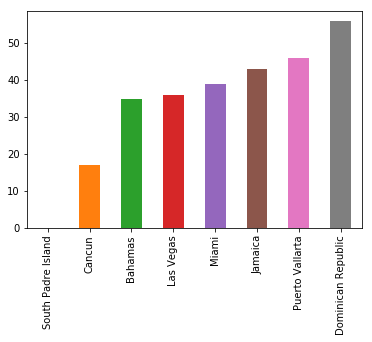

In [293]:
# voila!
# we get the same results, and we can graph it the same way too
df.groupby(level=0).toc_values.count().sort_values().plot.bar();

In [294]:
# the cool thing about extracting the toc_values is that we can now use the column values independently
# for example, let's group on the "toc_values" column and count the number of locations that share them
# we know that each location has exactly one unique scraped value, so we'll use it as our column for aggregation
df.groupby('toc_values').scraped.count()

toc_values
18th century                                   1
18th–19th centuries                            1
1996–present                                   1
20th century                                   1
20th century (1900–30)                         1
20th century immigration                       1
Administrative divisions                       3
Agriculture                                    1
Air transport                                  1
Airports                                       1
Amateur teams                                  1
Architecture                                   1
Armed forces                                   1
Beaches South of Puerto Vallarta               1
Beaches and beach towns                        1
Beaches and parks                              1
Beaches in Puerto Vallarta                     1
Beaches north of Puerto Vallarta               1
Bibliography                                   1
British rule (1655–1962)                       1
Broadcast

In [295]:
# a quick look at the top few rows and we can see 3 locations share the toc_value of "Administrative Divisions"
# lets `sort_values` in descending and see what else is shared
df.groupby('toc_values').scraped.count().sort_values(ascending=False)

toc_values
See also                                         7
External links                                   7
History                                          7
Education                                        7
Economy                                          6
References                                       6
Climate                                          6
Further reading                                  5
Demographics                                     5
Transportation                                   5
Geography                                        4
Culture                                          4
Sports                                           4
Government and politics                          3
Languages                                        3
Notes                                            3
Neighborhoods                                    3
Religion                                         3
Cuisine                                          3
Tourism             

In [296]:
# some interesting stuff here
# we can go even deeper by grouping on our share counts and then counting the number of toc_values in each
df.groupby('toc_values').scraped.count().reset_index().groupby('scraped').toc_values.count()

scraped
1    147
2     14
3      8
4      3
5      3
6      3
7      4
Name: toc_values, dtype: int64

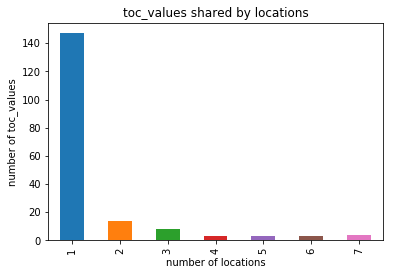

In [297]:
# this table shows us that there are 147 toc_values that belong to exactly one location, 14 that belong to two, etc.
# let's graph this and add some labels so we know what's going on
# create the graph, add a `title` parameter, store as `ax`
ax = df.groupby('toc_values').scraped.count().reset_index().groupby('scraped').toc_values.count().plot.bar(title='toc_values shared by locations')
# set the x-label
ax.set_xlabel('number of locations')
# set the y-label
ax.set_ylabel('number of toc_values');

In [298]:
# let's see which 4 toc_values belong to 7 locations
df.groupby('toc_values').scraped.count().where(lambda x : x == 7).dropna()

toc_values
Education         7.0
External links    7.0
History           7.0
See also          7.0
Name: scraped, dtype: float64

In [299]:
# it's important to note that there is more than one way to do things in python
# but according to the "Zen of Python":
# 'There should be one-- and preferably only one --obvious way to do it.
# Although that way may not be obvious at first unless you're Dutch.'
import this

In [300]:
# now I'm not Dutch
# so for a long time my go to solution for finding the toc_values shared amongst 7 locations would have been the following
test = df.groupby('toc_values').scraped.count()
test.loc[test == 7]

toc_values
Education         7
External links    7
History           7
See also          7
Name: scraped, dtype: int64

In [302]:
# obviously this solution works, but the downsides are:
# 1) I had to define a new variable which sucks up memory
# 2) defining a new variable is pointless if all you're going to do is filter it to see something
# hence the `.where` method is a much better solution
# getting back to the toc_values, a couple of these aren't much use to us right now ("External Links", "See also")
# "Education" and "History" sound intersting, and since 7/8 of the locations share it, we can probably make columns for them
# let's limits our "scraped" to just the Bahamas and find the "education" section
bahamas_scraped = df.loc['Bahamas', 'scraped'].unique()[0]

In [303]:
# looking at the html we can see that the "Education" section is marked by 'span' with attributes 'class' and 'id'
bahamas_scraped_education_span = bahamas_scraped.find(name='span', attrs={
    'class' : 'mw-headline',
    'id' : 'Education'
})

In [304]:
# https://stackoverflow.com/questions/42450743/extracting-the-text-between-two-header-tags-using-beautifulsoup-in-python

# what I want to do is pull all of the tags after the "Education" header, but before the next header
# to do this we will reference the 'span' tag,
# take a step back to its parent (<h2>),
# then use the method `.nextSiblingGenerator` to run through the siblings until we see another <h2> tag
# store the results in a list
# define the empty list...
education = []
# loop through the parent siblings...
for i in bahamas_scraped_education_span.parent.nextSiblingGenerator():
    # check the sibling name isn't "h2"...
    if i.name == 'h2':
        break
    # append the sibling...
    else:
        education.append(i)

In [305]:
# let's look at our education list
education

['\n',
 <div class="hatnote navigation-not-searchable" role="note">Main article: <a href="/wiki/Education_in_the_Bahamas" title="Education in the Bahamas">Education in the Bahamas</a></div>,
 '\n',
 <p>According to 1995 estimates, 98.2% of the Bahamian adult population is literate.<sup class="noprint Inline-Template Template-Fact" style="white-space:nowrap;">[<i><a href="/wiki/Wikipedia:Citation_needed" title="Wikipedia:Citation needed"><span title="This claim needs references to reliable sources. (February 2017)">citation needed</span></a></i>]</sup>
 </p>,
 '\n']

In [306]:
# see the 3 '\n' in our list?
# we don't want those as they don't provide any information
# to this we can check to see what their type is compared to the other items in our list
[type(i) for i in education]

[bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [307]:
# the '\n' have type `bs4.element.NavigableString` and the other items have type `bs4.element.Tag`
# to keep the NavigableStrings from getting in our list we can filter them out with an `if` statement
# but first we need to import `element` from `bs4`
from bs4 import element

In [308]:
education = []
for i in bahamas_scraped_education_span.parent.nextSiblingGenerator():
    if i.name == 'h2':
        break
    else:
        # filter out the `NavigableString`
        if type(i) != element.NavigableString:
            education.append(i)

In [309]:
# look at our list now
education

[<div class="hatnote navigation-not-searchable" role="note">Main article: <a href="/wiki/Education_in_the_Bahamas" title="Education in the Bahamas">Education in the Bahamas</a></div>,
 <p>According to 1995 estimates, 98.2% of the Bahamian adult population is literate.<sup class="noprint Inline-Template Template-Fact" style="white-space:nowrap;">[<i><a href="/wiki/Wikipedia:Citation_needed" title="Wikipedia:Citation needed"><span title="This claim needs references to reliable sources. (February 2017)">citation needed</span></a></i>]</sup>
 </p>]

In [384]:
# perfect! let's repeat this for all other locations and store the results in an "education_html" series
education_html = df.scraped.drop_duplicates().apply(lambda x : x.find(name='span', attrs={
    'class' : 'mw-headline',
    'id' : 'Education'
}))

In [385]:
# check for nulls
education_html.isnull().any()

True

In [386]:
# since there are nulls, we will have to remember to dropna later
# something else to note is that we cannot use a `break` inside a list-comprehension
# there are methods for getting around this while still doing a "one-liner", but they are beyond the scope of this tutorial
# this means we will have to define our own function and then apply it to our series
# inside our function we will place our for-loop code almost as-is
def education(x):
    education = []
    for i in x.parent.nextSiblingGenerator():
        if i.name == 'h2':
            break
        else:
            if type(i) != element.NavigableString:
                education.append(i)
    return education

In [387]:
# there are two ways to apply our function
# the first way is to use a lambda expression like we've been doing
education_html.dropna().apply(lambda x : education(x))

Bahamas               [<div class="hatnote navigation-not-searchable...
Cancun                [<table class="box-Expand_section plainlinks m...
Dominican Republic    [<div class="hatnote navigation-not-searchable...
Jamaica               [<div class="hatnote navigation-not-searchable...
Las Vegas             [<div class="hatnote navigation-not-searchable...
Miami                 [<h3><span class="mw-headline" id="Colleges_an...
Puerto Vallarta       [<p>Puerto Vallarta has schools for all levels...
Name: scraped, dtype: object

In [389]:
# the second way is just to apply the function
education_html.dropna().apply(education)

Bahamas               [<div class="hatnote navigation-not-searchable...
Cancun                [<table class="box-Expand_section plainlinks m...
Dominican Republic    [<div class="hatnote navigation-not-searchable...
Jamaica               [<div class="hatnote navigation-not-searchable...
Las Vegas             [<div class="hatnote navigation-not-searchable...
Miami                 [<h3><span class="mw-headline" id="Colleges_an...
Puerto Vallarta       [<p>Puerto Vallarta has schools for all levels...
Name: scraped, dtype: object

In [391]:
# the reason the second way works is because when you are applying a function,
# lambda is only needed when you want to do several things to the `x`
# if you are doing just one thing (i.e. applying one function), you can use the function as the only parameter
# let's convert our series `to_frame` and name it "education", then join it to `df`
df = df.join(education_html.dropna().apply(education).to_frame(name='education'))

In [397]:
# since we now have an education column we can remove the rows in our "toc_values" where it says "Education"
df = df.loc[df.toc_values != 'Education'].copy()

In [411]:
# exercise: repeat the above tasks for "History"
df = df.join(df.scraped.drop_duplicates().apply(lambda x : x.find(name='span', attrs={
    'class' : 'mw-headline',
    'id' : 'History'
})).dropna().apply(education).to_frame(name='history')).loc[df.toc_values != 'History'].copy()

In [413]:
# look at df
df.head()

,scraped,toc_values,education,history
Bahamas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...",Etymology,"[<div class=""hatnote navigation-not-searchable...","[<div class=""hatnote navigation-not-searchable..."
Bahamas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...",18th–19th centuries,"[<div class=""hatnote navigation-not-searchable...","[<div class=""hatnote navigation-not-searchable..."
Bahamas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...",20th century,"[<div class=""hatnote navigation-not-searchable...","[<div class=""hatnote navigation-not-searchable..."
Bahamas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...",Post-Second World War,"[<div class=""hatnote navigation-not-searchable...","[<div class=""hatnote navigation-not-searchable..."
Bahamas,"<html class=""client-nojs"" dir=""ltr"" lang=""en"">...",Geography,"[<div class=""hatnote navigation-not-searchable...","[<div class=""hatnote navigation-not-searchable..."


In [418]:
# now that we have two new columns, we can analyze them
# let's see how many tags are in the education column with respect to location
df.groupby(level=0).education.apply(lambda x : x.str.len()).drop_duplicates()

Bahamas                 2
Cancun                  4
Dominican Republic     10
Jamaica                 8
Las Vegas               6
Miami                  15
Puerto Vallarta         3
South Padre Island    NaN
Name: education, dtype: object

In [435]:
# let's also look at how many tags are in the history column
df.groupby(level=0).history.apply(lambda x : x.str.len()).drop_duplicates()

Bahamas                35
Cancun                 12
Dominican Republic    100
Jamaica                31
Las Vegas              18
Puerto Vallarta        38
South Padre Island    NaN
Name: history, dtype: object

In [444]:
# let's do them at the same time
df.groupby(level=0)[[
    'education',
    'history'
]].transform(lambda x : x.str.len()).drop_duplicates()

,education,history
Bahamas,2,35
Cancun,4,12
Dominican Republic,10,100
Jamaica,8,31
Las Vegas,6,18
Miami,15,12
Puerto Vallarta,3,38
South Padre Island,NaN,NaN


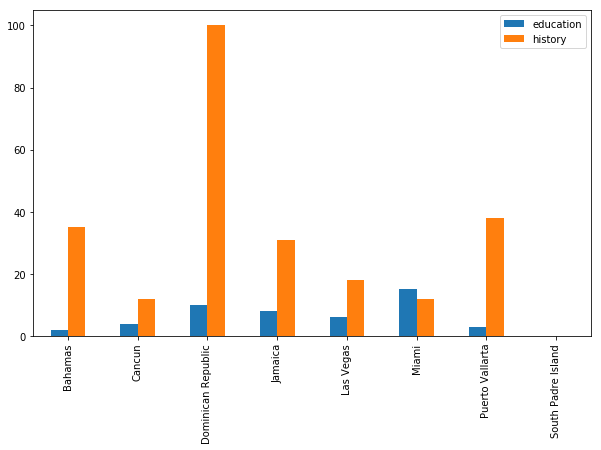

In [445]:
# notice that we used the method `transform` rather than `apply`
# if we had used apply we would have received an AttributeError
# this is because the apply function is mean for series
# what we have created before the transform is a `groupby` object, and the transform returns a dataframe
# now let's plot our results
df.groupby(level=0)[[
    'education',
    'history'
]].transform(lambda x : x.str.len()).drop_duplicates().plot.bar(figsize=(10,6));

In [ ]:
df.melt()

In [467]:
# it's clear that the Dominican Republic has more tags in the "History" section of the wiki
# but Miami has the more tags in the "Education" section
# let's dig a little further and see what kinds of tags are in each section starting with the "education" column
df.education.dropna().apply(lambda x : [i.name for i in x]).apply(pd.Series).drop_duplicates().reset_index().melt(id_vars='index', value_name='education_tags').drop(columns='variable').rename(columns={
    'index' : ''
}).set_index('').dropna().groupby(level=0).education_tags.agg([
    'count',
    pd.Series.nunique
])

,count,nunique
,,
Bahamas,2,2
Cancun,4,3
Dominican Republic,10,3
Jamaica,8,3
Las Vegas,6,3
Miami,15,4
Puerto Vallarta,3,2
